# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [200]:
total_returns = total_returns_usd[G10_FX]
spot_returns = spot_returns_usd[G10_FX]
carry_returns = carry_returns_usd[G10_FX]

# Settings

In [201]:
s = Settings(start_date = "2000-01-01", end_date = "2020-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126,
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

In [83]:
epu = pd.read_excel("C:/Users/vin_s/Downloads/Global_Policy_Uncertainty_Data.xlsx").iloc[:-4]

In [84]:
dates = epu["Year"].astype(str) + "-" + epu["Month"].astype(int).astype(str)

In [85]:
gepu = pd.DataFrame(epu["GEPU_current"])
gepu.index = pd.to_datetime(dates)
# gepu = gepu.shift(1)

<AxesSubplot:>

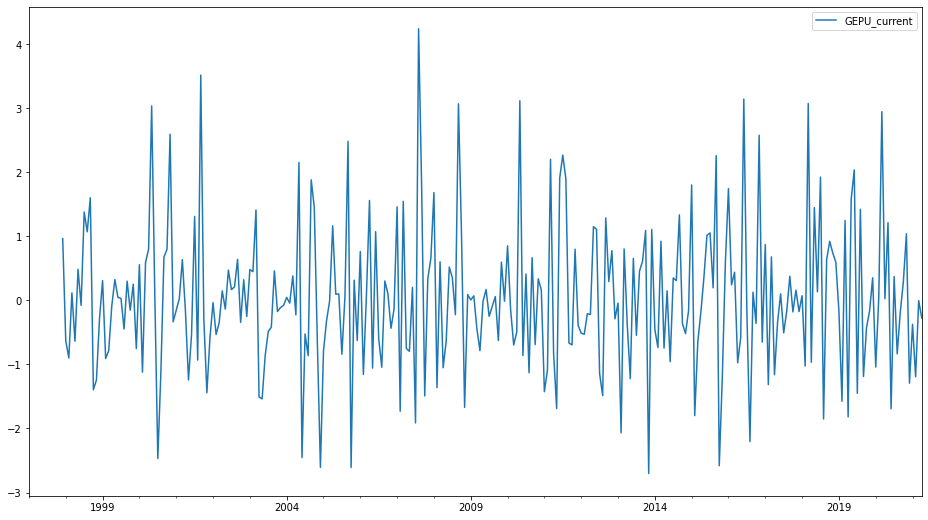

In [86]:
(gepu.diff()/gepu.pipe(rolling_vol,12)).plot()

In [87]:
full_gepu = (gepu.diff()/gepu.pipe(rolling_vol,12)).pipe(fill_date, True)

In [96]:
full_gepu = gepu.pipe(zscore,12).pipe(fill_date, True)

In [205]:
gpr = pd.read_excel("../../Codebase/gpr_web_latest.xlsx", sheet_name=1)

In [206]:
gpr_clean = pd.DataFrame(gpr[["GPR", "GPR_THREAT", "GPR_ACT", "GPR_BROAD", "GPR_NARROW",
                             "n11", "GPR_RAW", "GPR_THREAT_RAW", "GPR_ACT_RAW",
                             "GPR_BROAD_RAW", "GPR_NARROW_RAW"]].iloc[:-4])

In [207]:
gpr_clean.index = pd.to_datetime(gpr["Date"].iloc[:-4])

In [208]:
gpr_clean.index = [pd.to_datetime(str(x.year) + "-" + str(x.month) + "-15") for x in gpr_clean.index]

In [209]:
full_gpr = gpr_clean.loc["2002":]["GPR"].pipe(zscore, 12*3,typ="median").pipe(fill_date, True)

# Signal 

In [210]:
signal = cap_helper(full_gpr, 2)
# signal.plot()
sig = pd.concat([signal] * len(total_returns.columns), axis=1)
sig.columns = total_returns.columns
sig.index = pd.to_datetime(sig.index)
sig = sig.pipe(rolling_mean,5)

In [128]:
signal = cap_helper(full_gepu, 2)
# signal.plot()
sig = pd.concat([signal] * len(total_returns.columns), axis=1)
sig.columns = total_returns.columns
sig.index = pd.to_datetime(sig.index)
sig = sig.pipe(rolling_mean,5)

In [212]:
b = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = s)
b.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [213]:
bt_obj = b

In [214]:
get_summary(bt_obj)

Returns   : 0.060679458499120556
Vol       : 0.11776094886690008
SR        : 0.5152765758341827
Max DD    : -32.12

C Returns : 0.05522737331062743
C SR      : 0.5082002671398576
C Max DD  : -28.4

Hit rate  : 0.517
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.07


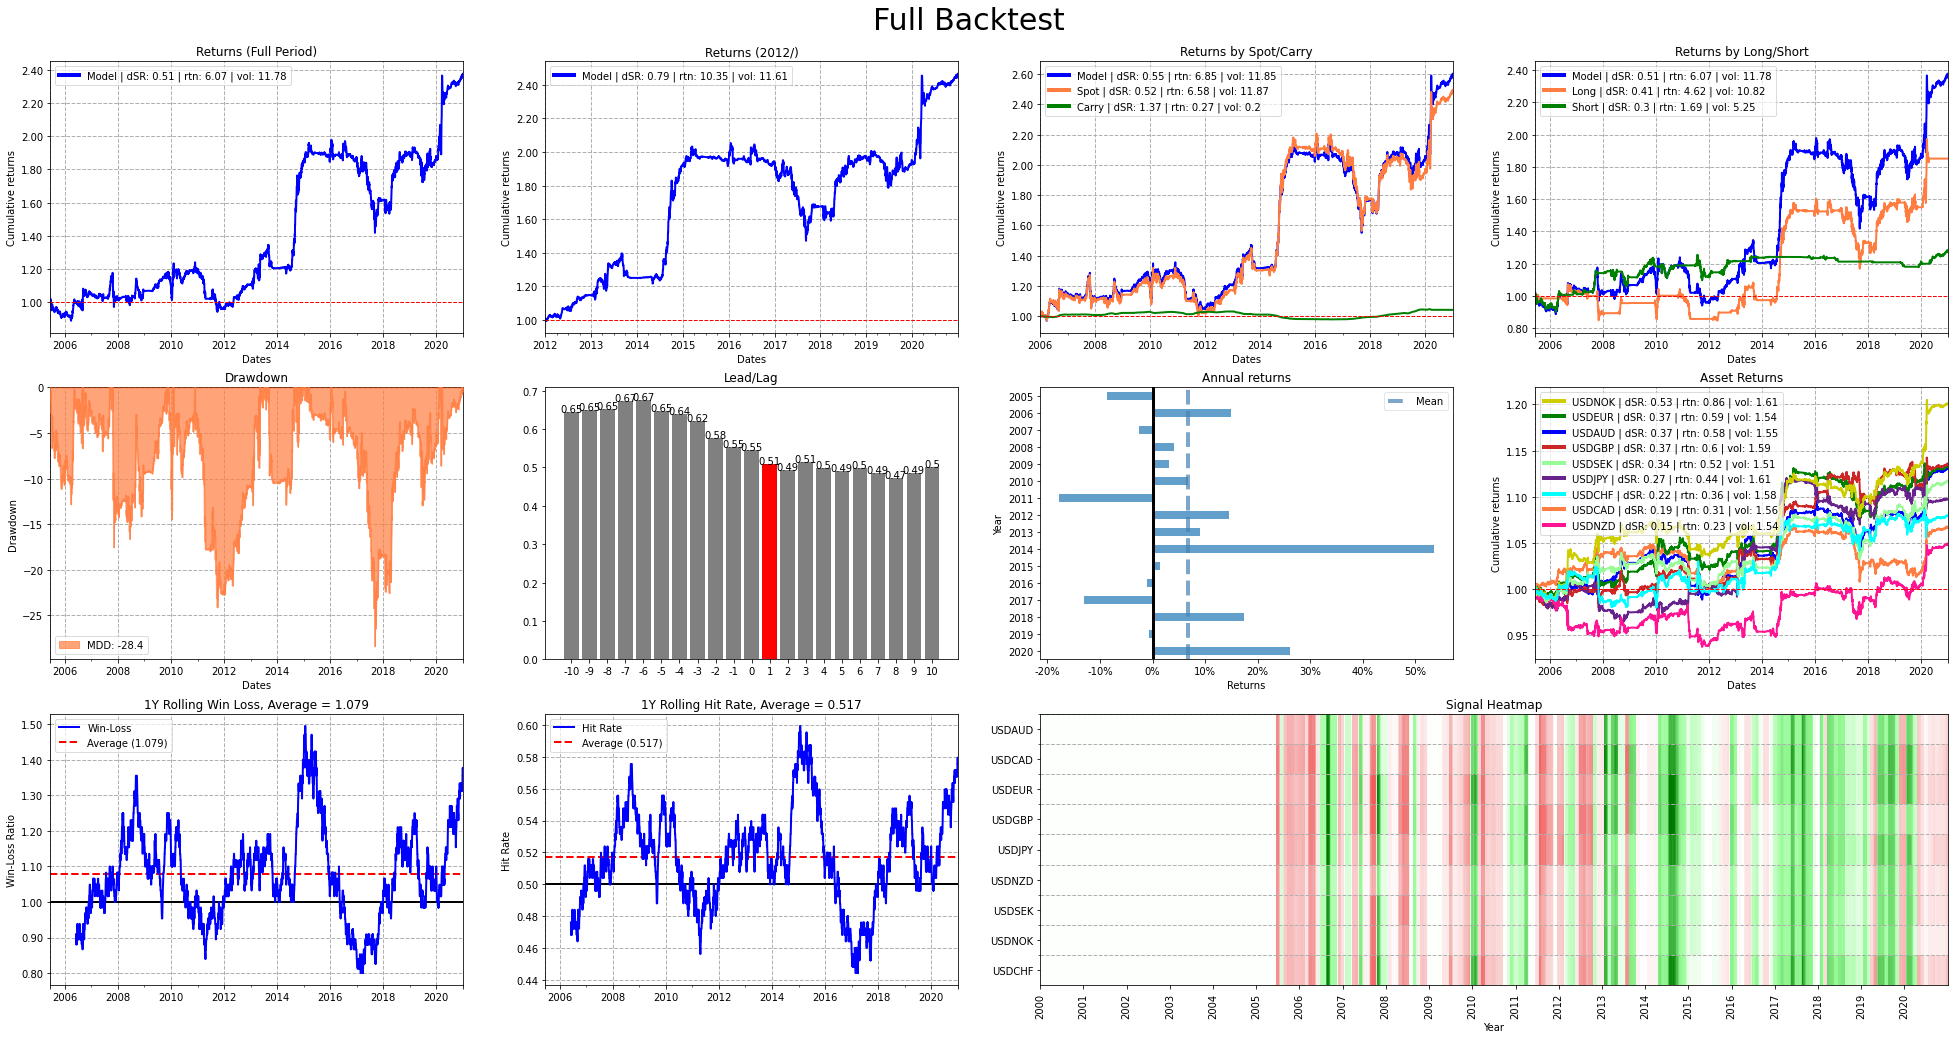

In [216]:
plot_bt(bt_obj)